# Predicting Diabetes

## Import Libraries

In [188]:
import pandas as pd                    # for handling dataframes
import matplotlib.pyplot as plt        # for plotting data
from matplotlib import cm              # import colour map
import numpy as np                     # provides N-dim object support

# do plottin ginline instead of a separate window
%matplotlib inline

## Load and Review Data

In [189]:
df = pd.read_csv("../pima-data.csv") # Load Pima Data

In [190]:
df.shape # (no. rows, no.cols)

(768, 10)

In [191]:
df.head(5) # see first 5 rows of dataframe

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [192]:
df.tail(5) # see last 5 rows of dataframe

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


A "feature" is something that is used to determine a result, a column is a physical structure that stores the value of a feature or result.

### Definition of Features

From the metadata on the data source we have the following definition of the features.

| Feature | Description | Comments |
| ------- | ----------- | -------- |
| num_preg | number of pregnancies |
| glucose_conc | Plasma glucose concentration after 2 hours in an oral glucose tolerance test |
| diastolic_bp | Diastolic blood pressure (mm Hg) |
| thickness | Triceps skin fold thickness (mm) |
| insulin | 2 hour serum insulin (mm U/mL) |
| bmi | Body mass index (weight in kg / (height in m)^2 |
| diab_pred | Diabetes pedigree function |
| Age (years) | Age in years |
| skin | ??? | unknown |
| diabetes | Class variable (1=True, 0=False) | Why is our data boolean (True/False)? |


### Columns to Eliminate

We want to eliminate columns that are used, contain no values, are duplicates / provide the same information in a different format (correlated columns).  
Correlated column e.g. ID and value associated with the ID add litte information as to how the data causes changes in the result and can amplify a bias as some algorithms treat every column as being independent and as important as every other.  
An example of this would be having room sizes of a house as square feet and as square metres, therefore amplifying that single factor's importance on the resulting house price.

### Check for null values

In [193]:
df.isnull().values.any()

False

### Check for correlated columns

In [194]:
def plot_corr(df, size=10):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    Inputs:
      df: pandas Dataframe
      size: vertical and horizontal size of the plot
    Displays:
      matrix of correlation between columns. blue-cyan-yellow-red-darkred => less to more correlated
                                             0 ------------------------> 1
                                             Expect a darkred line running from top left to bottom right.
    """
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr, cmap=cm.jet) # colour code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw x tick marks

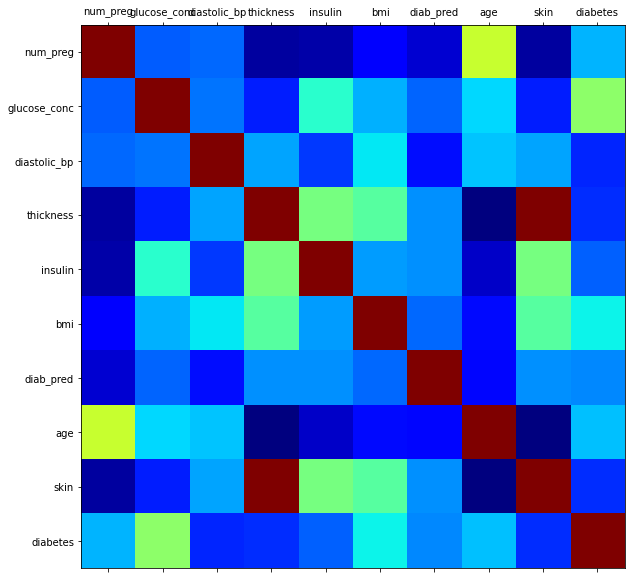

In [195]:
plot_corr(df)

Red squares where features are compared with themselves are expected in this instance, they are equal values and therefore directly correlated.  
Skin and thickness are highlighted as being different columns that may be duplicates.

In [196]:
df.corr() # viewing the raw correlation numbers

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [197]:
df.head() # observe if the correlation between skin and thickness would have been obious without calculation

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [198]:
del df["skin"] # remove the skin column, it offers no additional value to the dataset

In [199]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


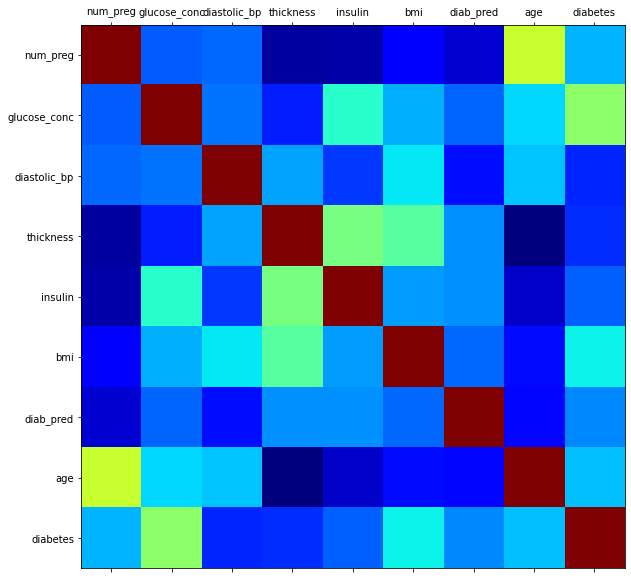

In [200]:
plot_corr(df) # check there are no remaining correlated columns.

## Molding the Data

- Ensure the data types of the columns are what we need
- Creating new columns based on existing data if required

### Check Data Types

In [201]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1 and False to 0 to convert boolean to integers.

In [202]:
diabetes_map = {True: 1, False: 0}

In [203]:
df["diabetes"] = df["diabetes"].map(diabetes_map)

In [204]:
df.head(5) # check diabetes column format

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false diabetes ratio

In [205]:
num_true = len(df.loc[df["diabetes"] == True])
num_false = len(df.loc[df["diabetes"] == False])
print(f"Number of True cases: {num_true} ({num_true/(num_true+num_false)*100:.2f}%)")
print(f"Number of False cases: {num_false} ({num_false/(num_true+num_false)*100:.2f}%)")

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


A ~35% occurrence of diabetes means a model can reasonably trained on this data without the use of specialist techniques.

## Splitting the data

70% for training, 30% for testing.

In [206]:
from sklearn.model_selection import train_test_split

feature_col_names = ["num_preg", "glucose_conc", "diastolic_bp", "thickness", "insulin", "bmi", "diab_pred", "age"]
predicted_class_names = ["diabetes"]

X = df[feature_col_names].values     # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 x m)
split_test_size = 0.30
# y = f(x)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)
                        # test_size 0.3 = 30% , 42 is answer to everything (seed for random number gen.)

Check to ensure the desired 70:30 train:test has been achieved.

In [207]:
print(f"{len(X_train)/len(df.index)*100:0.2f}% in the training set.")
print(f"{len(X_test)/len(df.index)*100:0.2f}% in the test set.")

69.92% in the training set.
30.08% in the test set.


### Verify the predicted value was correctly split

In [208]:
print(f"Original True: {(len(df.loc[df['diabetes'] == 1]))} ({len(df.loc[df['diabetes'] == 1])/len(df.index)*100:0.2f}%)")
print(f"Original False: {(len(df.loc[df['diabetes'] == 0]))} ({len(df.loc[df['diabetes'] == 0])/len(df.index)*100:0.2f}%)")
print("========")
print(f"Training True: {(len(y_train[y_train[:] == 1]))} ({len(y_train[y_train[:] == 1])/len(y_train)*100:0.2f}%)")
print(f"Training False: {(len(y_train[y_train[:] == 0]))} ({len(y_train[y_train[:] == 0])/len(y_train)*100:0.2f}%)")
print("========")
print(f"Test True: {(len(y_test[y_test[:] == 1]))} ({len(y_test[y_test[:] == 1])/len(y_test)*100:0.2f}%)")
print(f"Test False: {(len(y_test[y_test[:] == 0]))} ({len(y_test[y_test[:] == 0])/len(y_test)*100:0.2f}%)")

Original True: 268 (34.90%)
Original False: 500 (65.10%)
Training True: 188 (35.01%)
Training False: 349 (64.99%)
Test True: 80 (34.63%)
Test False: 151 (65.37%)


The diabetic/non-diabetic ratio was preserved when the dataset was split.

## Post-Split Data Prepartion

Hidden Missing Values

In [209]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Are these zero values possible / make sense given the context?  
Hoe many other rows have unexpected zero values?

In [210]:
print(f"{len(df)} rows in the dataframe.")
print(f"{len(df.loc[df['glucose_conc'] == 0])} rows missing glucose concentration.")
print(f"{len(df.loc[df['diastolic_bp'] == 0])} rows missing diastolic blood pressure.")
print(f"{len(df.loc[df['thickness'] == 0])} rows missing thickness.")
print(f"{len(df.loc[df['insulin'] == 0])} rows missing insulin.")
print(f"{len(df.loc[df['bmi'] == 0])} rows missing BMI.")
print(f"{len(df.loc[df['diab_pred'] == 0])} rows missing diab_pred.")
print(f"{len(df.loc[df['age'] == 0])} rows missing age.")

768 rows in the dataframe.
5 rows missing glucose concentration.
35 rows missing diastolic blood pressure.
227 rows missing thickness.
374 rows missing insulin.
11 rows missing BMI.
0 rows missing diab_pred.
0 rows missing age.


Options for missing data are as follows: ignore, drop observations, replace values (impute).  
374 rows missing insulin values would cause a significant bias, but removing those rows would be removing a significant amount of our data.  
Imputing could involve replacing the zero values with mean, median or another statistical value for that column, consulting an expert in that field to derive a value based on the other feature values.  
In this instance, imputing with the mean value will reinforce the existing insulin values.  

### Imputing with the Mean

In [211]:
from sklearn.impute import SimpleImputer

# Impute with mean all 0 readings
fill_0 = SimpleImputer(missing_values=0, strategy="mean")

# The means of each training/test set are different, so imputed values must be filled separately.
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm - Naive Bayes

In [212]:
from sklearn.naive_bayes import GaussianNB
# Create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.ravel())

GaussianNB()

### Performance on Training Data

In [213]:
# Predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# Import performance metrics library
from sklearn import metrics

# Accuracy
print(f"Accuracy: {metrics.accuracy_score(y_train, nb_predict_train):0.3f}")

Accuracy: 0.754


### Performance on Testing Data

In [214]:
# Predict values using the training data
nb_predict_test = nb_model.predict(X_test)

# Import performance metrics library
from sklearn import metrics

# Accuracy
print(f"Accuracy: {metrics.accuracy_score(y_test, nb_predict_test):0.3f}")

Accuracy: 0.736


#### Metrics

In [215]:
print("Confusion Matrix")
print("True Negative (Actual Diabetes, predicted Not Diabetes), False Positive (Not Diabetes, predicted Diabetes)")
print("False Negative (Not Diabetes, predicted Not Diabetes), True Positive (Diabetes, predicted Diabetes)")
print(metrics.confusion_matrix(y_test, nb_predict_test))
print("=====")
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))
print("Recall = TP / (TP + FN)")
print("Precision = TP / (TP + FP)")

Confusion Matrix
True Negative (Actual Diabetes, predicted Not Diabetes), False Positive (Not Diabetes, predicted Diabetes)
False Negative (Not Diabetes, predicted Not Diabetes), True Positive (Diabetes, predicted Diabetes)
[[118  33]
 [ 28  52]]
=====
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231

Recall = TP / (TP + FN)
Precision = TP / (TP + FP)


## Improving Model Performance

- Adjust current algorithm by adjusting hyperparameters (not possible with NB)
- Get additional data or improve the data available
- Improve how the data is trained
- Select a new algorithm that works better with the data provided

## Random Forest

Random Forest is an ensemble algorithm based on decision trees, it fits multiple trees with random subsets of the training data. The tree results are averaged to improve performance and control overfitting. 


In [216]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=10) # Create Random Forest object
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

### Performance on Training Data

In [217]:
rf_predict_train = rf_model.predict(X_train)
# Training Metrics
print(f"Accuracy: {metrics.accuracy_score(y_train, rf_predict_train):.4f}")

Accuracy: 0.9870


### Performance on Test Data

In [218]:
rf_predict_test = rf_model.predict(X_test)
# Test Metrics
print(f"Accuracy: {metrics.accuracy_score(y_test, rf_predict_test):.4f}")

Accuracy: 0.7100


In [219]:
print(metrics.confusion_matrix(y_test, rf_predict_test))
print("=====")
print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

[[121  30]
 [ 37  43]]
=====
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



The accuracy of the algorithm on the training data is extremely high whereas with the testing data it is much less so, this is characteristic of "overfitting".  
As all data was used from the study new data cannot be introduced to improve the accuracy and cross-validation has low efficacy with Random Forest as RF already does that when constructing the branches.  
The most feasible solution is to try another algorithm.

## Logistic Regression

In [220]:
from sklearn.linear_model import LogisticRegression

# C is the regularisation hyperparameter
lr_model = LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# Training Metrics
print(f"Accuracy: {metrics.accuracy_score(y_test, lr_predict_test):.4f}")
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("=====")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7446
[[128  23]
 [ 36  44]]
=====
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

    accuracy                           0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



First max value of 0.613 occurred at C=1.300


Text(0, 0.5, 'Recall score')

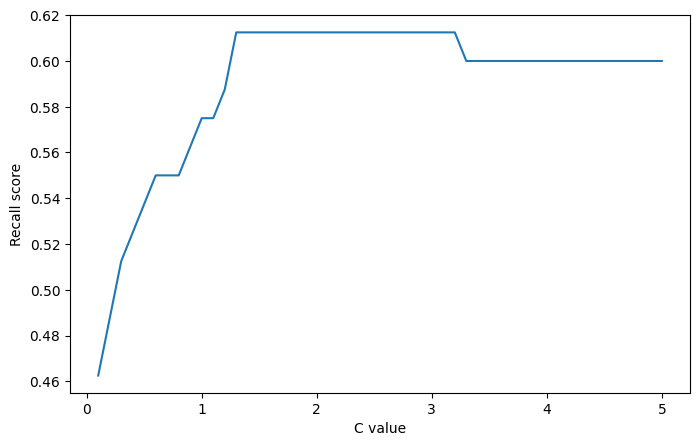

In [221]:
# Optimising recall with regularisation parameter
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print(f"First max value of {best_recall_score:.3f} occurred at C={best_score_C_val:.3f}")

%matplotlib inline
plt.figure(figsize=(8,5), dpi=100)
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("Recall score")

### Logistic regression with class_weight="balanced" (correct for imbalanced diabetes:non-diabetes records)

1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall score')

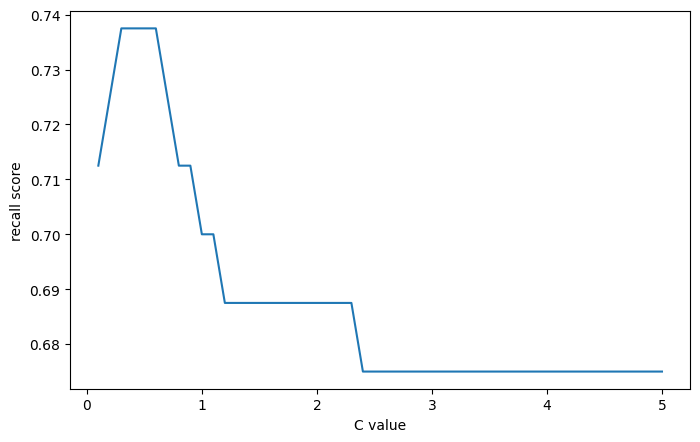

In [222]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.figure(figsize=(8,5), dpi=100)
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [223]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# Training Metrics
print(f"Accuracy: {metrics.accuracy_score(y_test, lr_predict_test):.4f}")
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("=====")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7143
[[106  45]
 [ 21  59]]
=====
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

    accuracy                           0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231



### Logistic Regression Cross-Validation

In [224]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, n_jobs=-1,
                     random_state=42, refit=False)

In [225]:
lr_cv_predict_test = lr_cv_model.predict(X_test)

# Training Metrics
print(f"Accuracy: {metrics.accuracy_score(y_test, lr_cv_predict_test):.4f}")
print(metrics.confusion_matrix(y_test, lr_cv_predict_test))
print("=====")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7056
[[109  42]
 [ 26  54]]
=====
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       151
           1       0.56      0.68      0.61        80

    accuracy                           0.71       231
   macro avg       0.68      0.70      0.69       231
weighted avg       0.72      0.71      0.71       231

